<a href="https://colab.research.google.com/github/alexDahersh/Data-Science-fund./blob/main/Copy_of_Unit3ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 17.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [2]:
import preliz as pz

# Unit 3 Exercises: Delightfully Diverse Distirbutions

Use these exercises as a chance to explore the probability distributions (dists) from the pymc and preliz libraries. [Moments](https://en.wikipedia.org/wiki/Moment_(mathematics)), the main subject of these exercises, are a great way to describe dists, but there's another  way: [maximum entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples), which  we'll cover in a later unit.

Here's what we'll cover in this Unit's exercises:
- The first four moments: mean, variance, skew, and kurtosis, as well as the support.
- Single variable continuous distributions.
- Single variable discrete distriutions


Why do we need to know this stuff? Two reasons:
- Probability distributions are required to set priors and likelihoods in pymc.
- Randomness and uncertainty are not well defined mathematically, but probability and probability distributions are.

With that in mind, think of these exercises as an oppurtunity to explore the ways we can be uncertain, or the ways things can be random.

## The First Four Moments: Mean, Variance, Skew, and Kurtosis

When we talk about a probablity dist, we often care about at four things:
- The expected value, or where a distribution is centered (mean)
- The amount of variation from that centered value (variation)
- Whether or not our distribution favors, leans towards, or skews towards certain values. (skew)
- How often to expect unusually high or low values. (kurtosis)

### Playing with Beta

**Task1**:

Plot a [preliZ Beta distribution](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.distributions.beta.Beta) with $α=1$ and $β=1$.

<Axes: >

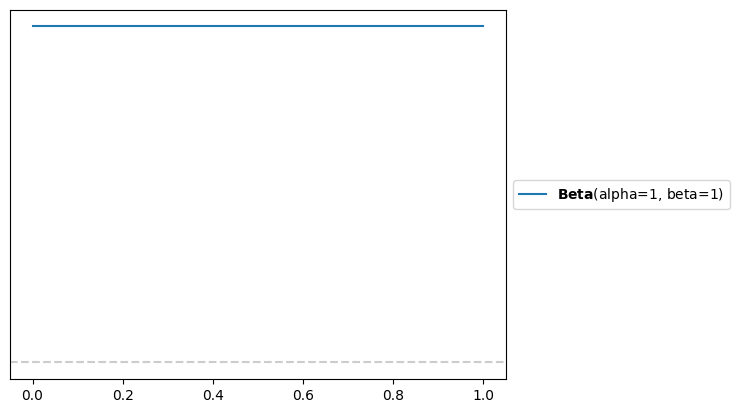

In [ ]:
my_beta = pz.Beta(alpha=1, beta=1)
my_beta.plot_pdf()

**Task2**:

Find the mean, variance, skew, and kurtosis of a $Beta(1,1)$ distribution. This is the same as asking for the first four moments of a $Beta(1,1)$ distribution.

*Hint*: preliZ has built in function that does this for you.

In [ ]:
my_beta.moments(types='m'), my_beta.moments(types='v'), my_beta.moments(types='s'), my_beta.moments(types='k') # prints mean, variance, skew, and kurtosis in that order

([0.5], [0.08333333333333333], [array(0.)], [-1.2])

**Task3**:

Plot the following distributions: $Beta(1,1)$, $Beta(0.9,0.9)$, $Beta(2,1)$, $Beta(1,2)$, $Beta(7,11)$, $Beta(96,42)$, $Beta(5,5)$, $Beta(500,500)$, $Beta(0.8,0.9)$.

Then, determine which of those distribtuions has:
- the largest/smallest mean
- the largest/smallest variance
- the largest/smallest skew
- the largest/smallest kurtosis

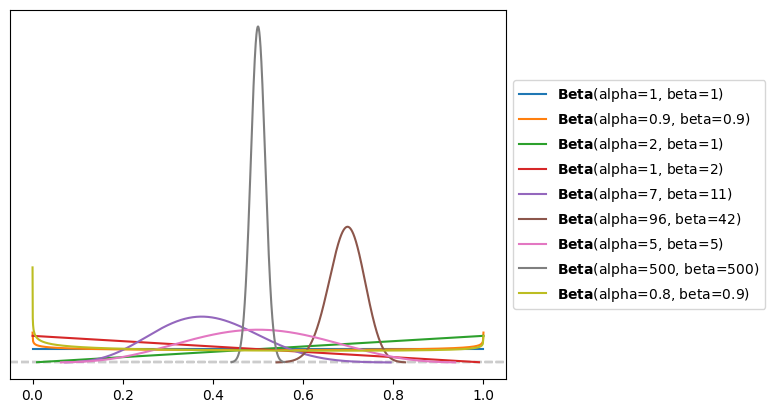

In [ ]:
dists = []

dists.append(pz.Beta(1,1))
dists.append(pz.Beta(.9,.9))
dists.append(pz.Beta(2,1))
dists.append(pz.Beta(1,2))
dists.append(pz.Beta(7,11))
dists.append(pz.Beta(96,42))
dists.append(pz.Beta(5,5))
dists.append(pz.Beta(500,500))
dists.append(pz.Beta(.8,.9))

for dist in dists:
  dist.plot_pdf()

Just looking at this, I'd guess Beta(500,500) has the smallest variance, skew, and kurtosis. Maybe Beta(7,11) has the smallest mean and Beta(96,42) has the highest.

In [ ]:
highMoments = [0,0,0,0]
smallMoments = [0,0,0,0]

moments = ['m','v','s','k']

for i in range(1,len(dists)): # Goes through every dist'n
  for k in range(4): # Goes through every moment in each dist'n
    if dists[smallMoments[k]].moments(types=moments[k]) > dists[i].moments(types=moments[k]): # Checks if the moment is a new low
      smallMoments[k] = i
    if dists[highMoments[k]].moments(types=moments[k]) < dists[i].moments(types=moments[k]): # Checks if the moment is a new high
      highMoments[k] = i

for i in range(4): # Loops through the moments and prints the highs and lows
  print("Smallest " + moments[i] + " is: ",end='')
  print(dists[smallMoments[i]])
  print("Highest " + moments[i] + " is: ",end='')
  print(dists[highMoments[i]])

Smallest m is: Beta(alpha=1, beta=2)
Highest m is: Beta(alpha=96, beta=42)
Smallest v is: Beta(alpha=500, beta=500)
Highest v is: Beta(alpha=0.8, beta=0.9)
Smallest s is: Beta(alpha=2, beta=1)
Highest s is: Beta(alpha=1, beta=2)
Smallest k is: Beta(alpha=0.8, beta=0.9)
Highest k is: Beta(alpha=500, beta=500)


###Playing with other Continuous Distributions

For the remaining tasks, make sure to continue to use the [preliZ documentation](https://preliz.readthedocs.io/en/latest/api_reference.html).

The [wikipedia pages for each of the probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions) are also great resources.

[Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/probability/probability-distributions) is another great resource as well.

**Task4**:

Plot the pdfs of each of the following distributions: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$, $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=1,σ1)$

For the T distribution, use

```
support=(-4,4)
```
inside the plot_pdf function.


<Axes: >

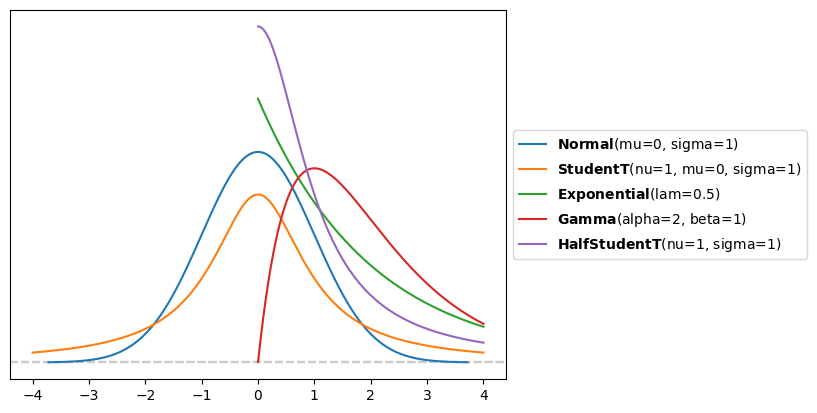

In [ ]:
pz.Normal(mu=0,sigma=1).plot_pdf()
pz.StudentT(nu=1,mu=0,sigma=1).plot_pdf(support=(-4,4))
pz.Exponential(lam=1/2).plot_pdf(support=(0.001,4))
pz.Gamma(alpha=2,beta=1).plot_pdf(support=(0.001,4))
pz.HalfStudentT(nu=1,sigma=1).plot_pdf(support=(0.001,4))

**Task5**:

What x values do the Exponenital, Gamma, HalfSutdentT, and HalfNormal functions support? What x values do the Normal and T distribution support? What x values does the Beta distribution support?

The Exponetitial, Gamma, HalfStudentT, and HalfNormal supports x values above 0.

The Normal and T distribution support all x values.

The beta distribution supports x values between 0 and 1

**Task6**:

Can a distribution with support $[0,∞]$ have zero skew? If so, plot that specific distribution.

I'd guess that a uniform distribution between 0 and infinity would have 0 skew. I'd also guess that can't be graphed with preliz. Even if it could be graphed, it would be indistinguishable from the x axis.

<Axes: >

/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


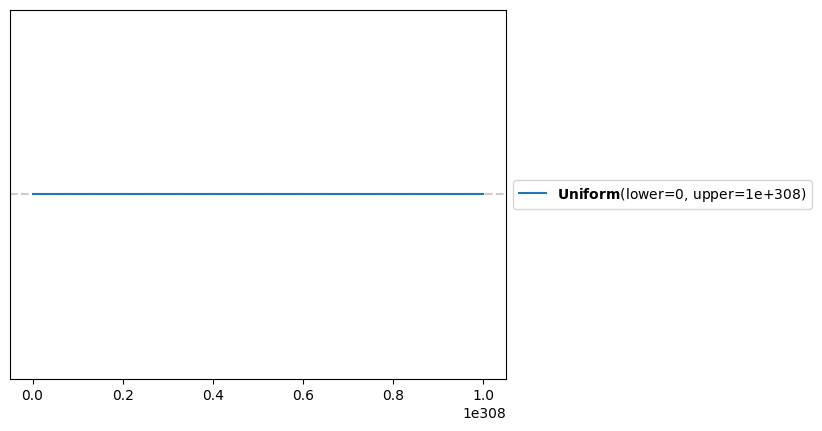

In [ ]:
pz.Uniform(lower=0,upper=99999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999).plot_pdf() # the max amount of nines

The Uniform distribution from 0 to infinity would look something like this except it goes to infinity, not 1e308. The uniform distribution has no skew.

/usr/local/lib/python3.10/dist-packages/preliz/distributions/betascaled.py:144: RuntimeWarning: overflow encountered in scalar multiply
  return (self.alpha * self.upper + self.beta * self.lower) / (self.alpha + self.beta)
/usr/local/lib/python3.10/dist-packages/preliz/distributions/betascaled.py:153: RuntimeWarning: overflow encountered in scalar power
  * (self.lower - self.upper) ** 2
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


[inf, inf, -0.565685424949238, -0.6]


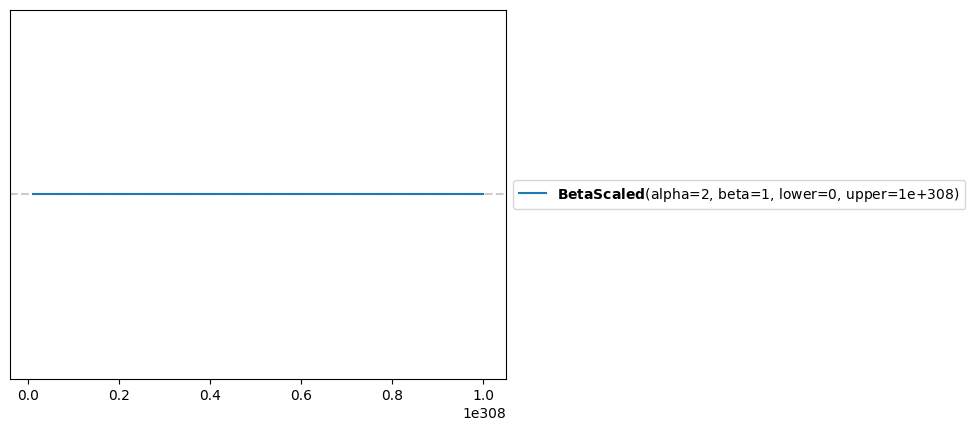

In [4]:
pz.BetaScaled(alpha=2,beta=1,lower=0,upper=1e308).plot_pdf()
print(pz.BetaScaled(alpha=2,beta=1,lower=0,upper=1e308).moments())

In [ ]:
# BetaScaled(2,1,0,inf) has support [0,inf) and has a negative skew

**Task7**:

Name a distribution that supports the real numbers with variance equal to 1, 0 skew, and 0 kurtosis.

In [ ]:
pz.Normal(mu=0,sigma=1).moments()

[0.0, 1.0, 0, 0]

The normal distribution!

**Task8**:

Name a distribution with support $(-∞,∞)$ and that has negative skew.

In [ ]:
pz.SkewNormal(mu=0,sigma=1,alpha=-1).moments()

[-0.5641895835477563,
 0.6816901138162094,
 -0.13694876731165254,
 0.0617443154193264]

A SkewNormal distribution with alpha=-1

###Playing with Discrete Distributions

**Task9**:

Plot the pdfs (techincally the pmfs) of the following distributions: $Bernoulli(p=0.7)$, $Binomial(n=10,p=0.7)$, $Poisson(λ=7)$, $Geometric(p=0.7)$, $HyperGeometric(N=50,k=35,n=15)$, $Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])$

Additionally, compute the first four moments for all those distributions--except the Categorical distribution.

<Axes: >

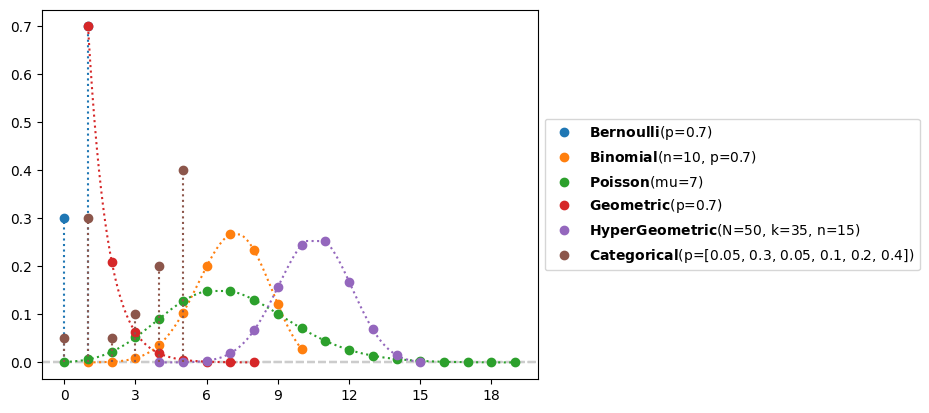

In [ ]:
dists2 = []

dists2.append(pz.Bernoulli(p=.7))
dists2.append(pz.Binomial(n=10,p=.7))
dists2.append(pz.Poisson(mu=7))
dists2.append(pz.Geometric(p=.7))
dists2.append(pz.HyperGeometric(N=50,k=35,n=15))

for dist in dists2:
  dist.plot_pdf()

pz.Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4]).plot_pdf()

In [ ]:
for dist in dists2:
  print("A ",end=''); print(dist, end=''); print(" distribution has mean, variance, skew, kurtosis equal to: ",end=''); print(dist.moments())

A Bernoulli(p=0.7) distribution has mean, variance, skew, kurtosis equal to: [0.7, 0.21000000000000002, -0.8728715609439692, -1.238095238095238]
A Binomial(n=10, p=0.7) distribution has mean, variance, skew, kurtosis equal to: [7.0, 2.1000000000000005, -0.27602622373694163, -0.12380952380952379]
A Poisson(mu=7) distribution has mean, variance, skew, kurtosis equal to: [7.0, 7.0, 0.3779644730092272, 0.14285714285714285]
A Geometric(p=0.7) distribution has mean, variance, skew, kurtosis equal to: [1.4285714285714286, 0.6122448979591838, 2.3734644158557194, 7.633333333333333]
A HyperGeometric(N=50, k=35, n=15) distribution has mean, variance, skew, kurtosis equal to: [10.5, 2.25, -0.1111111111111111, -0.08983451536643026]


**Task10**:

Describe what process each of the previous discrete distributions models, and their support.

Hint: Make sure to read any of the preliZ documentation, the wikipedia articles, or wolfram alpha.


A Bernoulli distribution models a single success or failure. For example, it could model the chance a coin lands on heads, with 1 being heads and 0 being tails. Its support is {0,1}.

A Binomial distribution models a series of Bernoulli distributions. With some n attempts, it shows the probability of getting x successes. For example, it could model how many times a coin could land on heads if it was flipped 60 times. Its support is all whole numbers greater than or equal to zero and less than or equal to n.

A Poisson distribution models how many times an event could happen in a given time. For example, a Poisson distribution could model how many times a human is born each day in the world given some expected rate. Its support is all whole numbers greater than or equal to 0.

A Geometric distribution models how many attempts, or Bernoulli trials, it takes before the first success. For example, it could model how many times a coin needs to be flipped before it lands on heads. The support of the geometric distribution is all whole numbers greater than 0.

A HyperGeometric distribution models how successes result for n trials without replacement. For example, if there are 5 red balls and 5 green balls in a bag, a HyperGeometric distribution could model how many red balls could be picked if 8 balls were picked. The support of a HyperGeometric distribution is: [Max( 0 , Total number of objects drawn - number of objects that don't count as a success), Min(Total number of objects drawn, number of objects that cound as a success)]

